In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('50_Startups.csv')

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
finalDataSet = pd.concat([pd.get_dummies(data.State), data.iloc[:,[0,1,2,4]]] , axis = 1)
finalDataSet.head()

,California,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
0,0,0,1,165349.20,136897.80,471784.10,192261.83
1,1,0,0,162597.70,151377.59,443898.53,191792.06
2,0,1,0,153441.51,101145.55,407934.54,191050.39
3,0,0,1,144372.41,118671.85,383199.62,182901.99
4,0,1,0,142107.34,91391.77,366168.42,166187.94


In [5]:
features = finalDataSet.iloc[:,:-1].values
label = finalDataSet.iloc[:,-1].values

# Perform Backward Elimination and Get the Best Features

In [9]:
#Step 1: Perform All In
#We need to append intercept feature i.e. 1

featuresAllIn = np.append(np.ones((50,1)).astype(int) , features, axis = 1)

In [10]:
#Step 2: Decide SL - 0.05

In [12]:
#Step 3: Perform OLS (Calc P-value)

import statsmodels.formula.api as stat

#endog --- label column in the form of numpy array
#exog ---- feature columns in the form of numpy array

model1 = stat.OLS(endog=label , exog=featuresAllIn).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sat, 09 Nov 2019   Prob (F-statistic):           1.34e-27
Time:                        04:37:24   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.763e+04   5073.636      7.417      0.000    2.74e+04    4.79e+04
x1          1.249e+04   2449.797      5.099      0.000    7554.868    1.74e+04
x2          1.269e+04   2726.700      4.654      0.000    7195.596    1.82e+04
x3          1.245e+04   2486.364      5.007      0.000    7439.285    1.75e+04
x4             0.8060      0.046     17.369      0.000       0.712       0.900
x5            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x6             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     2.42e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.64e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [13]:
#Step 4: Select the feature with highest p-value
# we selected x5


In [14]:
#Step 5: if p value > SL {} else {}
# Recreate featurearray eliminating Admin Spend

In [15]:
newFeatures = featuresAllIn[:,[0,1,2,3,4,6]]
model2 = stat.OLS(endog=label , exog=newFeatures).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     215.8
Date:                Sat, 09 Nov 2019   Prob (F-statistic):           9.72e-29
Time:                        04:42:09   Log-Likelihood:                -525.53
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1071.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.525e+04   2100.376     16.782      0.000     3.1e+04    3.95e+04
x1          1.171e+04   1910.312      6.130      0.000    7861.854    1.56e+04
x2          1.185e+04   2170.903      5.459      0.000    7477.785    1.62e+04
x3          1.169e+04   1988.428      5.879      0.000    7684.996    1.57e+04
x4             0.7967      0.042     18.771      0.000       0.711       0.882
x5             0.0298      0.016      1.842      0.072      -0.003       0.062
==============================================================================
Omnibus:                       14.640   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.037
Skew:                          -0.938   Prob(JB):                     2.70e-05
Kurtosis:                       5.565   Cond. No.                     1.15e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.49e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [16]:
newFeatures2 = featuresAllIn[:,[0,1,2,3,4]]
model3 = stat.OLS(endog=label , exog=newFeatures2).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     272.4
Date:                Sat, 09 Nov 2019   Prob (F-statistic):           2.76e-29
Time:                        04:43:36   Log-Likelihood:                -527.35
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      46   BIC:                             1070.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.686e+04   1959.786     18.806      0.000    3.29e+04    4.08e+04
x1          1.189e+04   1956.677      6.079      0.000    7955.697    1.58e+04
x2          1.306e+04   2122.665      6.152      0.000    8785.448    1.73e+04
x3           1.19e+04   2036.022      5.847      0.000    7805.580     1.6e+04
x4             0.8530      0.030     28.226      0.000       0.792       0.914
==============================================================================
Omnibus:                       13.418   Durbin-Watson:                   1.122
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.605
Skew:                          -0.907   Prob(JB):                     0.000150
Kurtosis:                       5.271   Cond. No.                     4.95e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.53e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [18]:
#Create Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(newFeatures2,
                                                label,
                                                test_size=0.2,
                                                random_state= 1)

In [19]:
#Create LinearRegression Model using newFeatures2 as features and label as label
from sklearn.linear_model import LinearRegression
finalModel = LinearRegression()
finalModel.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
print(finalModel.score(X_train,y_train))
print(finalModel.score(X_test,y_test))

0.9387161169637389
0.9611102529882842


In [23]:
# Example on Standardization and Normalization

data = np.array([[1],[2],[3],[4],[5],[6],[7],[8],[9],[100],[200]])
datasetExample = pd.DataFrame(data, columns=['salary'])

In [24]:
datasetExample

,salary
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,100


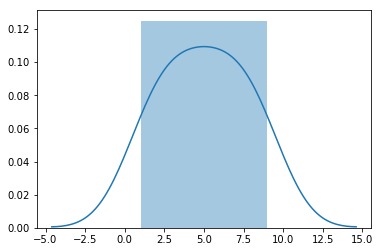

In [32]:
sns.distplot(datasetExample.iloc[0:9,:])

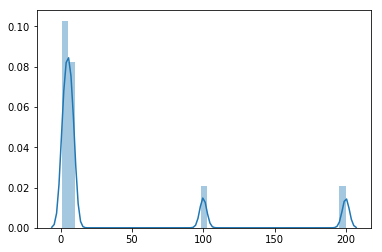

In [26]:
import seaborn as sns
%matplotlib inline
sns.distplot(datasetExample)

In [27]:
#Standardization
datasetNP = datasetExample.values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
finalFeatures = sc.fit_transform(datasetNP)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


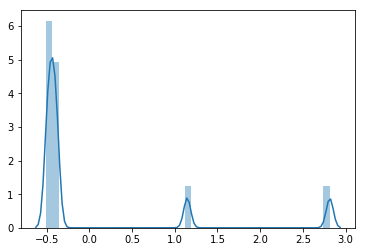

In [28]:
sns.distplot(finalFeatures)

In [29]:
finalFeatures

array([[-0.50692834],
       [-0.4902331 ],
       [-0.47353785],
       [-0.45684261],
       [-0.44014736],
       [-0.42345212],
       [-0.40675687],
       [-0.39006163],
       [-0.37336638],
       [ 1.14590089],
       [ 2.81542536]])

In [30]:
#Normalization
finalFeature2 = np.log(datasetNP)
finalFeature2

array([[0.        ],
       [0.69314718],
       [1.09861229],
       [1.38629436],
       [1.60943791],
       [1.79175947],
       [1.94591015],
       [2.07944154],
       [2.19722458],
       [4.60517019],
       [5.29831737]])

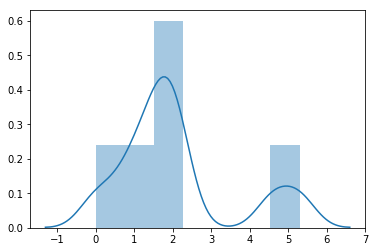

In [31]:
sns.distplot(finalFeature2)

In [ ]:
#Outlier Elimination -- 1.5IQR rule